In [ ]:
! sudo apt-get update
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-extra cm-super

In [2]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] requires ghostscript.


In [11]:
def variance(alpha,q):
  return alpha*q**2 + (1-q)**2

In [40]:
def plot_variance_alpha_curves(alphas):
  q = np.linspace(0,1,1000)
  fig = plt.figure(figsize = (12,6))
  ax = plt.gca()
  ax.set_ylim([0, 2])
  for alpha in alphas:
    plt.plot(q, variance(alpha,q),"-", label = r"$\alpha$"+f" = {alpha}", linewidth = 3)
    optimal = 1/(1+alpha)
    plt.plot(optimal, variance(alpha,optimal), "o", color = "red")
  plt.legend(loc = "upper left", fontsize = 13)
  plt.xticks(fontsize=25)
  plt.xlabel(r"$q$", fontsize = 30)
  plt.yticks(fontsize=25)
  plt.ylabel(r"$\mathbb{V}(\hat{C})$", fontsize = 30)
  plt.ylim(0,2.5)
  plt.xlim(-0.01,1.01)
  plt.grid()
  plt.title(r"$\mathbb{V}(\hat{C})$ against $q$ under different $\alpha$",fontsize = 30, y = 1.05)
  plt.tight_layout()
  plt.savefig("balance", bbox_inches='tight')

1. $H$ is the first estimator from iterating through the reference dimensions one to several times. $T$ is the second estimator from the tail. We introduce $\alpha$ to describe the ratio between the variance of the both estimators:  $\mathbb{V}(T) = \alpha \mathbb{V}(H)$. $\alpha$ in general is greater euqal 1 because $\mathbb{V}(T) > \mathbb{V}(H)$ .

2. We combine the both estimators in order to fuse the information and get a better estimator. The new estimator has the following form: $\hat{C}(q) = (1-q)H + qT, q \in (0,1)$ because it should be unbiased.

3. Now we investigate the Variance of the new estimator $Z$.
$\mathbb{V}(\hat{C}_{\alpha}(q)) = ((1-q)^2 + \alpha q^2)\mathbb{V}(H)$.

4. Under the assumption that $\mathbb{V}(T) = \alpha \mathbb{V}(H)$, we want to find the $q$ to minimize $\mathbb{V}(\hat{C}_{\alpha}(q))$

5. We plot the function $\mathbb{V}(\hat{C}_{\alpha}(q))$ with different $\alpha$


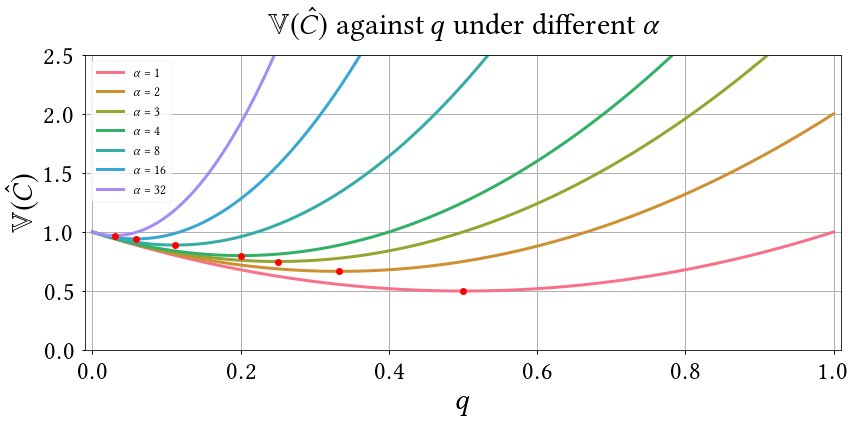

In [41]:
alphas = [1,2,3,4,8,16,32]
plot_variance_alpha_curves(alphas)